In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

<AxesSubplot:>

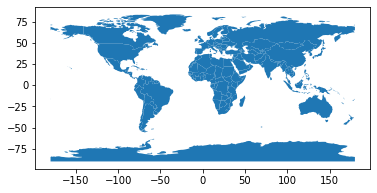

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

<AxesSubplot:>

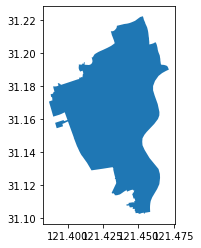

In [3]:
Xuhui = gpd.read_file("C:\ProgramData\Anaconda3\Lib\site-packages\geopandas\datasets\China\上海市\徐汇区.shp")
Xuhui.plot()

In [4]:
"""下载城市边界"""
city = ox.geocode_to_gdf('xuhui')

"""基于范围下载路网"""
G = ox.graph_from_bbox(22.5229, 22.5178, 113.9265, 113.9360, network_type='drive')
G_projected = ox.project_graph(G)

"""保存为geodataframe"""
nodes, edges = ox.graph_to_gdfs(G_projected)

<AxesSubplot:>

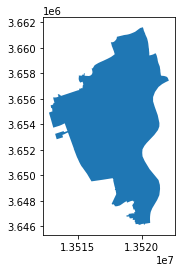

In [5]:
Xuhui.to_crs("EPSG:3857").plot()

<AxesSubplot:>

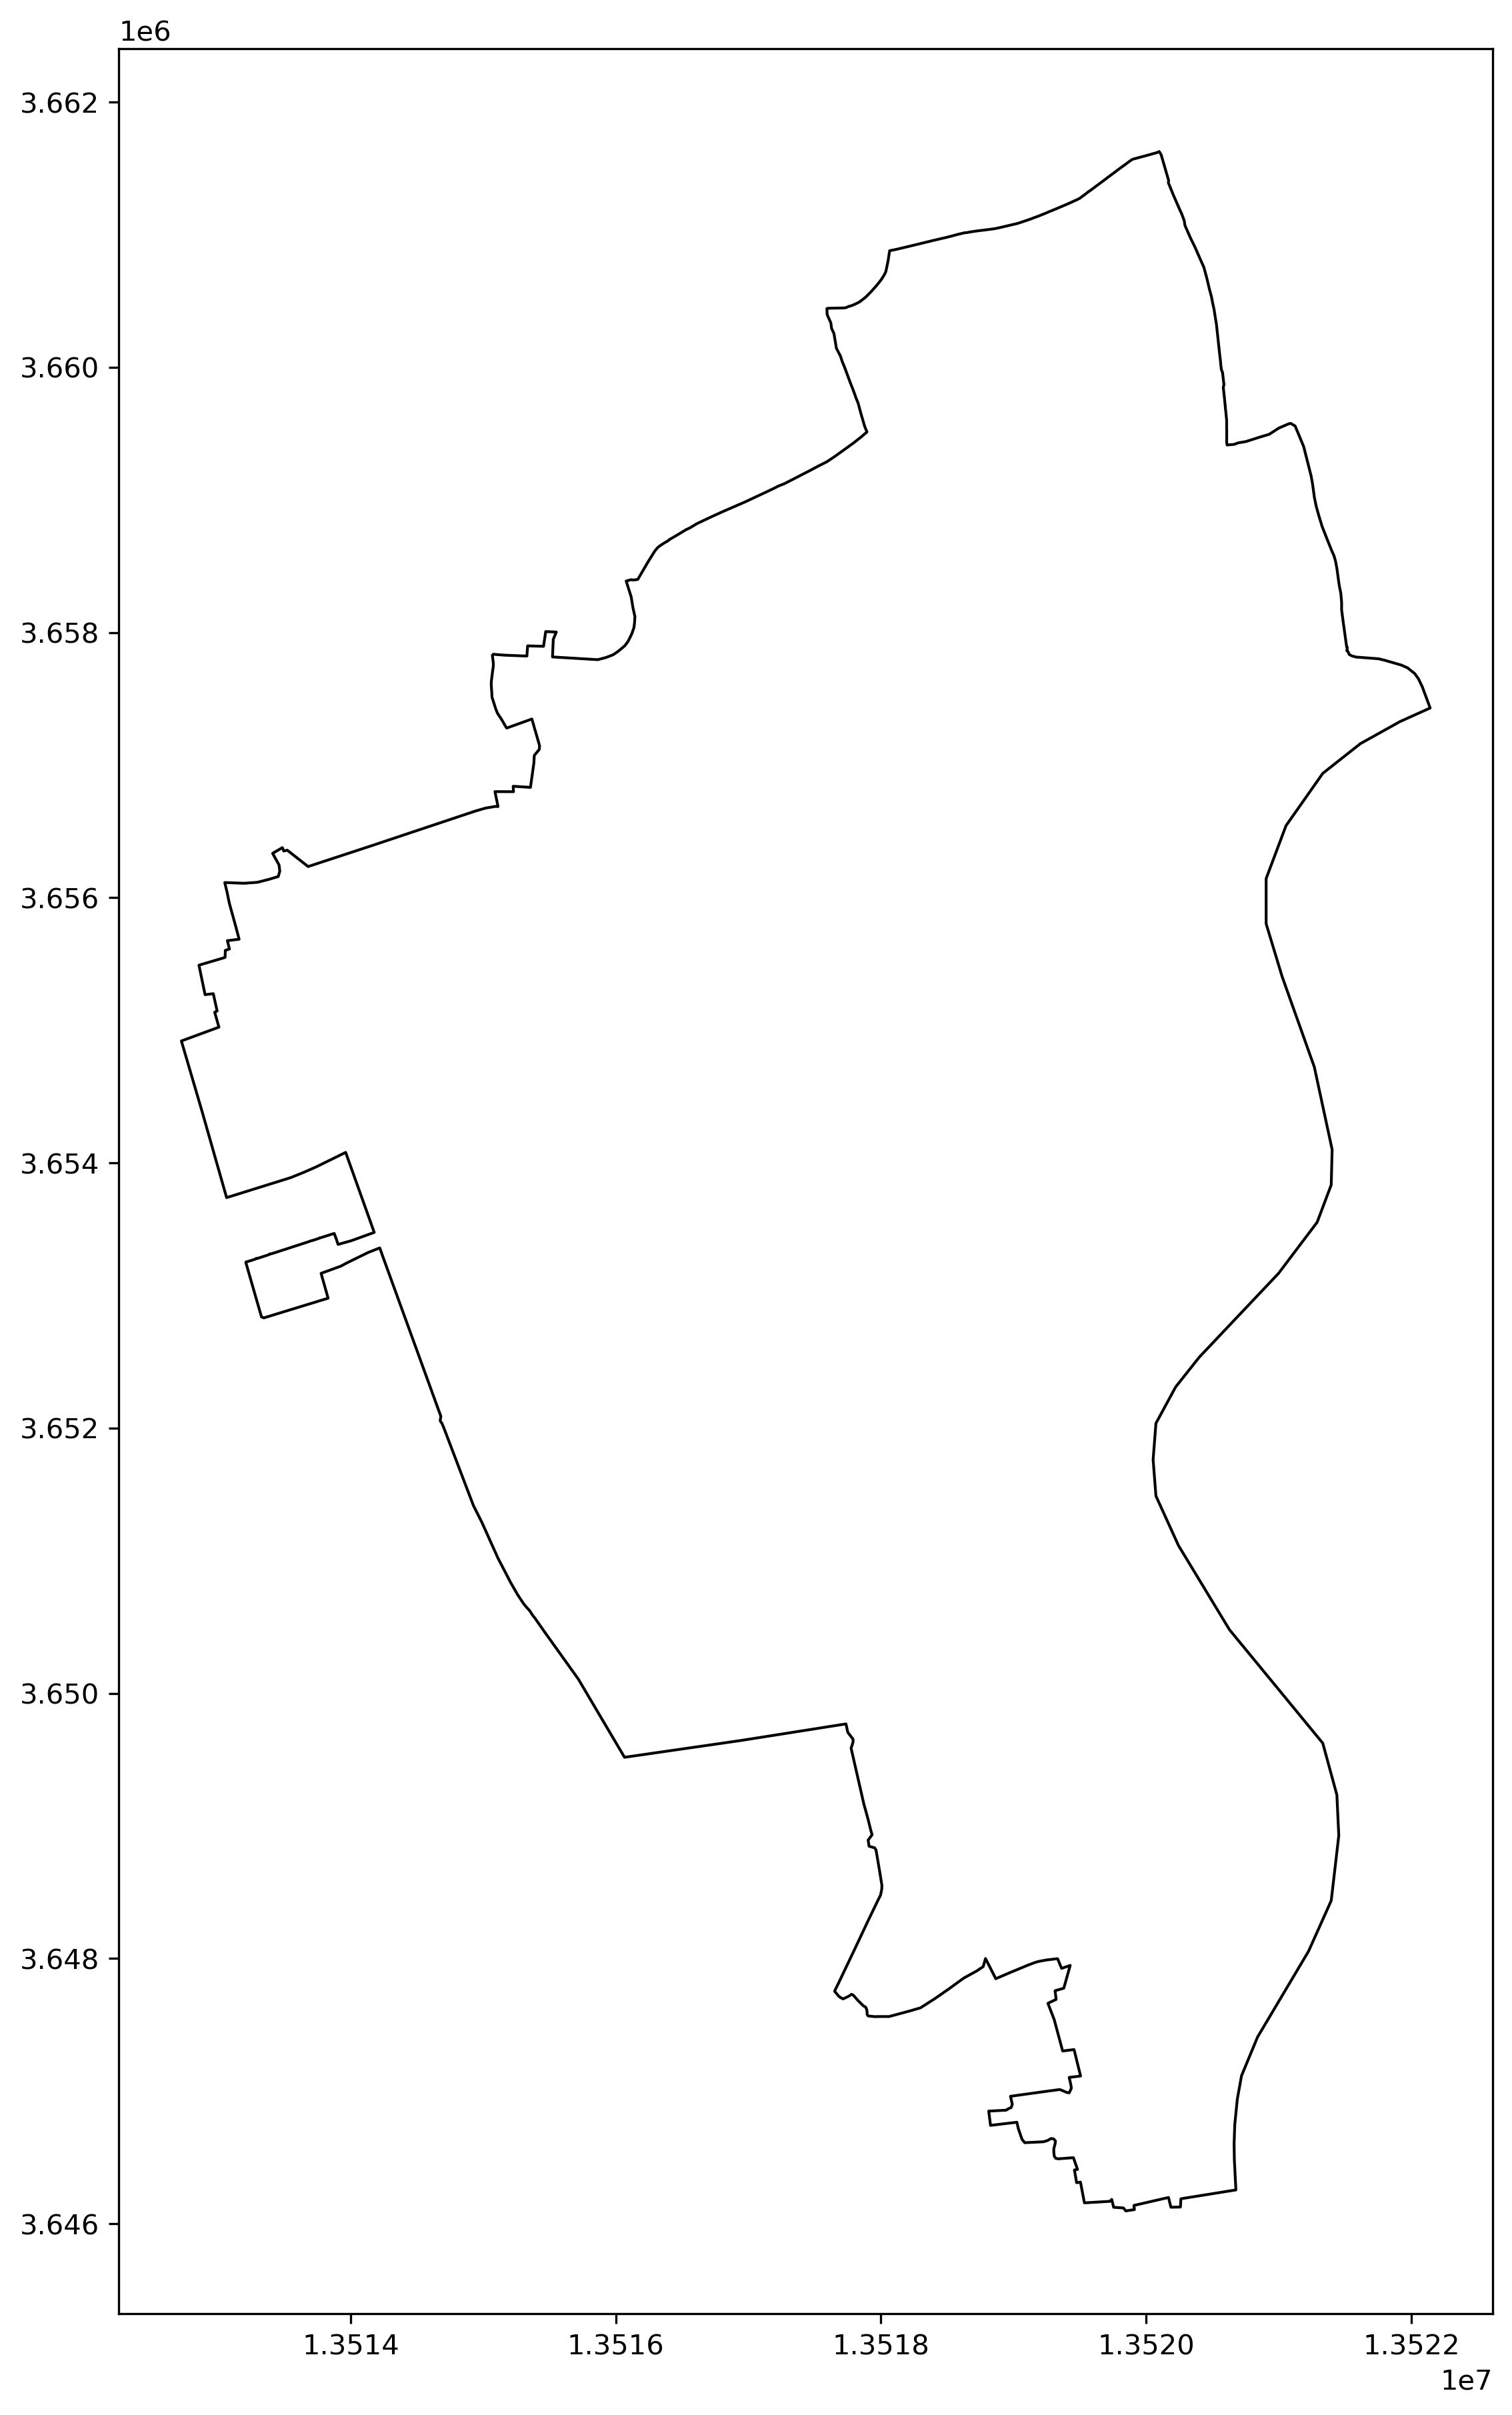

In [11]:
fig = plt.figure(figsize=(15,15),dpi=300)
ax = fig.add_subplot(1,1,1)
Xuhui.boundary.to_crs("EPSG:3857").plot(ax=ax, edgecolor='k',linewidth=1, zorder=2)
# city.boundary.to_crs("EPSG:3857").plot(ax=ax,edgecolor='gray',linewidth=0.8,zorder=1)
# for idx, _ in enumerate(city.geometry.representative_point().to_crs(3857)):
#     region = city.loc[idx, 'NL_NAME_2']
#     ax.text(_.x, _.y, region, ha="center", va="center", size=6,color='k')
# military_point.to_crs("EPSG:3857").plot(column='type', cmap='YlGn',markersize=5,edgecolor='k',linewidth=0.3, ax=ax, legend=True,legend_kwds={'loc': 8,"title":"图例","shadow":True,"ncol":5}, zorder=3)
# ctx.add_basemap(ax, source='https://d.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png',zoom=8)

### 下载并保存行政边界、道路网
#### OSMnx可以快速下载到世界上大多数地区的省市县级别的行政边界图

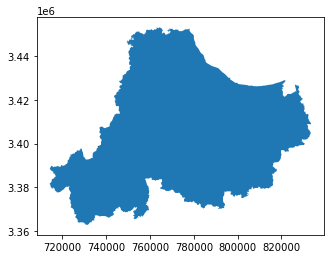

In [14]:
"""单个位置边界下载""" 
city = ox.geocode_to_gdf('湖州市') 
ax = ox.project_gdf(city).plot()

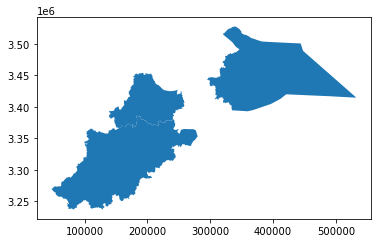

In [18]:
"""多个位置边界下载""" 
places = ox.geocode_to_gdf(["上海市" ,"杭州市" ,"湖州市"]) 
places = ox.project_gdf(places) 
ax = places.plot()

OSMnx可以快速下载到世界上大多数地区的省市县级别的行政边界图

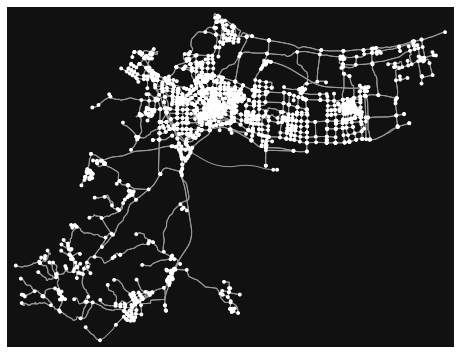

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [19]:
"""基于行政边界下载路网""" 
G = ox.graph_from_place('吴兴区, 湖州市', network_type='drive') 
G_projected = ox.project_graph(G) 
ox.plot_graph(G_projected)

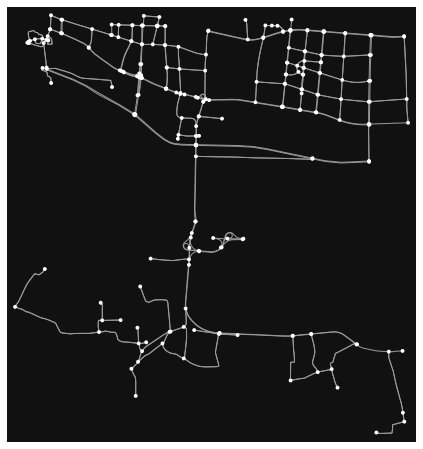

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [20]:
"""基于框选范围下载路网""" 
G = ox.graph_from_bbox(30.76, 30.86, 120.11, 120.22, network_type='drive') 
G_projected = ox.project_graph(G) 
ox.plot_graph(G_projected)

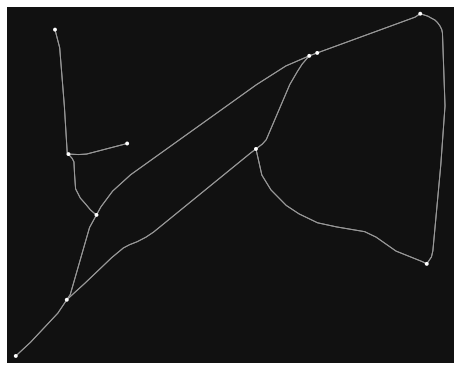

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [21]:
"""基于点缓冲区下载路网""" 
G = ox.graph_from_point((30.78,120.15), dist=1000, network_type='all') 
ox.plot_graph(G)

OSMnx也和geopandas进行了很好的联动，也只需要很简单的几行代码就可以完成数据转存为GeoDataFrame的格式，你也可以利用这种方式将其导出为shp格式的文件

In [ ]:
# """将保存点和边两个文件""" 
# nodes, edges = ox.graph_to_gdfs(G) 
# edges.head(1)

In [6]:
from ridge_map import RidgeMap
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# # 从本地的字体文件中注册字体
# font_prop = fm.FontProperties(fname="fonts/UncialAntiqua-Regular.ttf")

# 基于传入的区域左下角、右上角经纬度
# 来获取原始高程数据并绘制成山脊地图
# 如果你有“特殊的上网技巧”，这一步等待时间会很短
(
    RidgeMap(bbox=(120.250305,30.890695,121.714966,31.275080),
             )
#              font=font_prop)
    .plot_map(label="Hawai'i")
)

plt.savefig('图3.png')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\urllib\request.py", line 1354, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1255, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1301, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1250, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1010, in _send_output
    self.send(msg)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 950, in send
    self.connect()
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 1424, in connect
    self.sock = self._context.wrap_socket(self.sock,
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 500, in wrap_socket
  

TypeError: object of type 'NoneType' has no len()